In [1]:
import pandas as pd
import shutil
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.losses import MeanSquaredError, MeanAbsoluteError
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix

In [2]:
shutil.unpack_archive('Data/ECG5000.zip', '/Data')

In [3]:
train = pd.read_csv('Data/ECG5000_TRAIN.txt', delimiter= '\s+', index_col=False, header=None)
test = pd.read_csv('Data/ECG5000_TEST.txt', delimiter= '\s+', index_col=False, header=None)

In [4]:
# Concatenate the Datasets
data = pd.concat((train, test))
data.shape

(5000, 141)

In [5]:
# Shuffle the Data
data = data.sample(frac=1.0).reset_index(drop=True)

In [6]:
data.columns = ['target'] + [str(i+1) for i in range(140)]

In [7]:
data.head()

,target,1,2,3,4,5,6,7,8,9,...,131,132,133,134,135,136,137,138,139,140
0,2.0,-1.076518,-2.145648,-2.217155,-2.547368,-2.517417,-2.383406,-2.155876,-1.757775,-1.283194,...,-1.895135,-2.481236,-2.992688,-3.627671,-3.909510,-3.663098,-2.801687,-1.516771,-0.872257,0.285495
1,1.0,0.008054,-2.540059,-3.596222,-4.002416,-3.955112,-3.485964,-2.443186,-1.723818,-1.559497,...,0.897243,1.066895,1.328484,1.558748,1.401597,1.020790,0.919811,1.366513,1.608791,-0.912211
2,2.0,-0.407316,-0.773122,-0.691841,-1.292007,-1.379722,-1.514838,-1.822801,-2.036075,-2.122831,...,0.351512,0.010131,-0.500339,-1.368758,-1.889633,-2.884411,-3.933395,-4.219199,-5.880890,-3.605017
3,1.0,1.286816,1.597359,-0.002036,-1.648727,-2.937171,-3.944908,-3.314220,-2.325005,-1.844284,...,-0.102553,0.279436,0.874798,0.884747,1.390660,1.982470,2.085247,1.727726,0.633470,1.331687
4,1.0,-1.054981,-2.238752,-3.294692,-4.164757,-4.447843,-4.004216,-2.968951,-1.791470,-1.616632,...,1.096035,1.225556,0.997093,0.630915,0.005850,-0.372375,-0.759160,-0.931554,-0.567517,-0.996713


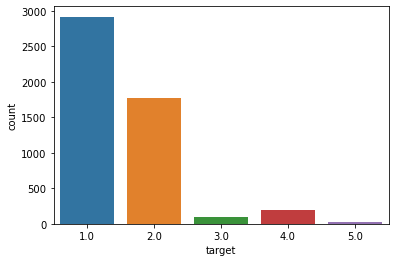

1.0    2919
2.0    1767
4.0     194
3.0      96
5.0      24
Name: target, dtype: int64


In [8]:
sns.countplot(data=data, x='target')
plt.show()
print(data.target.value_counts())

- 1.0 represents the normal signal
- 2.0, 3.0, 4.0, 5.0 represents the anomaly signal

### Data Preprocessing

1 is Normal

0 is Anomaly

In [9]:
# Make binary labels
data['target'] = data['target'].apply(lambda x: 1.0 if x==1.0 else 0.0)

In [10]:
data.head()

,target,1,2,3,4,5,6,7,8,9,...,131,132,133,134,135,136,137,138,139,140
0,0.0,-1.076518,-2.145648,-2.217155,-2.547368,-2.517417,-2.383406,-2.155876,-1.757775,-1.283194,...,-1.895135,-2.481236,-2.992688,-3.627671,-3.909510,-3.663098,-2.801687,-1.516771,-0.872257,0.285495
1,1.0,0.008054,-2.540059,-3.596222,-4.002416,-3.955112,-3.485964,-2.443186,-1.723818,-1.559497,...,0.897243,1.066895,1.328484,1.558748,1.401597,1.020790,0.919811,1.366513,1.608791,-0.912211
2,0.0,-0.407316,-0.773122,-0.691841,-1.292007,-1.379722,-1.514838,-1.822801,-2.036075,-2.122831,...,0.351512,0.010131,-0.500339,-1.368758,-1.889633,-2.884411,-3.933395,-4.219199,-5.880890,-3.605017
3,1.0,1.286816,1.597359,-0.002036,-1.648727,-2.937171,-3.944908,-3.314220,-2.325005,-1.844284,...,-0.102553,0.279436,0.874798,0.884747,1.390660,1.982470,2.085247,1.727726,0.633470,1.331687
4,1.0,-1.054981,-2.238752,-3.294692,-4.164757,-4.447843,-4.004216,-2.968951,-1.791470,-1.616632,...,1.096035,1.225556,0.997093,0.630915,0.005850,-0.372375,-0.759160,-0.931554,-0.567517,-0.996713


In [11]:
print(data.target.value_counts())

1.0    2919
0.0    2081
Name: target, dtype: int64


In [12]:
# Make Label y
y = data['target']

# Make Feature Batch
X = data.drop('target', axis=1)

In [13]:
# Train Test split of Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, shuffle=True)

In [14]:
y_train = y_train.astype(bool)
y_test = y_test.astype(bool)

In [15]:
X_train_normal = X_train[y_train].values # All Normal Samples for Training
X_train_anomaly = X_train[~y_train].values # All Anomaly Samples for Evaluation

### Scaling

In [16]:
def minmax(scale_min=0.0, scale_max=1.0):
    max_val = np.max(X_train_normal)
    min_val = np.min(X_train_normal)
    X_train_normal = (scale_max - scale_min) * (X_train_normal - min_val) / (max_val - min_val) + scale_min
    X_train_anomaly = (scale_max - scale_min) * (X_train_anomaly - min_val) / (max_val - min_val) + scale_min
    X_test = (scale_max - scale_min) * (X_test - min_val) / (max_val - min_val) + scale_min
    return X_train_normal, X_train_anomaly, X_test
    

def standardize():
    mean = np.mean(X_train_normal)
    std = np.std(X_train_normal)
    X_train_normal = (X_train_normal - mean) / std
    X_train_anomaly = (X_train_anomaly - mean) / std
    X_test = (X_test - mean) / std
    return X_train_normal, X_train_anomaly, X_test
    
    
#X_train_normal, X_train_anomaly, X_test = standardize()
#X_train_normal, X_train_anomaly, X_test = minmax()

### Fully Connected Neural Network Autoencoder

In [17]:
model_dense = tf.keras.Sequential([
    Dense(64, activation='relu', input_shape=(140,)),
    #Dropout(0.2),
    Dense(16, activation='relu'),
    #Dropout(0.2),
    Dense(8, activation='relu'),  # Bottleneck Layer
    #Dropout(0.2),
    Dense(16, activation='relu'),
    #Dropout(0.2),
    Dense(64, activation='relu'),
    #Dropout(0.2),
    Dense(140, activation='relu')
])
model_dense.compile(optimizer='adam', loss='mse')
print(model_dense.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                9024      
_________________________________________________________________
dense_1 (Dense)              (None, 16)                1040      
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_3 (Dense)              (None, 16)                144       
_________________________________________________________________
dense_4 (Dense)              (None, 64)                1088      
_________________________________________________________________
dense_5 (Dense)              (None, 140)               9100      
Total params: 20,532
Trainable params: 20,532
Non-trainable params: 0
____________________________________________________

In [18]:
def train(model,
          X_train,
          X_eval,
          epochs=20):
    X_train = tf.convert_to_tensor(X_train, dtype=tf.float32)
    X_eval = tf.convert_to_tensor(X_eval, dtype=tf.float32)

    # Train model on Normal Train Data (Normal Data Only)
    # Validate Model on complete Test Set (Normal + Anomaly)
    history = model.fit(X_train,
                        X_train,
                        epochs=epochs,
                        #batch_size=500,
                        validation_data=(X_eval, X_eval),
                        shuffle=True)
    
    # Plot Losses
    plt.figure()
    plt.plot(history.history['loss'], label='Normal Data Loss', color='green')
    plt.plot(history.history['val_loss'], label='Anomaly Data Loss', color='red')
    plt.legend()
    plt.title('Training Loss')
    plt.xlabel('Epoch')
    plt.ylabel('MAE')
    plt.savefig('Plots/FC_Training_Losses.png')
    plt.show()

    # Reconstruction Losses of Normal + Anomaly Data
    train_pred = model.predict(X_train)
    train_loss = tf.keras.losses.mae(train_pred, X_train).numpy()
    print('Train Loss', np.mean(train_loss))

    test_pred = model.predict(X_eval)
    val_loss = tf.keras.losses.mae(test_pred, X_eval).numpy()
    print('Test Loss', np.mean(val_loss))
    
    #threshold = 0.5
    threshold = np.mean(train_loss) + 1.4*np.std(train_loss)
    
    sns.histplot(train_loss, color='green', kde=True)    
    sns.histplot(val_loss, color='red', kde=True)
    plt.axvline(x=threshold)
    plt.savefig('Plots/FC_Training_Histogram.png')
    plt.title('Training Loss of all Samples - Fully Connected Network')
    plt.show()
    
    return threshold
    

Epoch 1/40
28/28 [==============================] - 0s 5ms/step - loss: 0.8723 - val_loss: 1.0219
Epoch 2/40
28/28 [==============================] - 0s 2ms/step - loss: 0.7933 - val_loss: 0.9830
Epoch 3/40
28/28 [==============================] - 0s 3ms/step - loss: 0.7713 - val_loss: 0.9627
Epoch 4/40
28/28 [==============================] - 0s 3ms/step - loss: 0.7465 - val_loss: 0.9574
Epoch 5/40
28/28 [==============================] - 0s 2ms/step - loss: 0.7416 - val_loss: 0.9506
Epoch 6/40
28/28 [==============================] - 0s 2ms/step - loss: 0.7389 - val_loss: 0.9468
Epoch 7/40
28/28 [==============================] - 0s 2ms/step - loss: 0.7358 - val_loss: 0.9432
Epoch 8/40
28/28 [==============================] - 0s 3ms/step - loss: 0.7320 - val_loss: 0.9407
Epoch 9/40
28/28 [==============================] - 0s 4ms/step - loss: 0.7267 - val_loss: 0.9344
Epoch 10/40
28/28 [==============================] - 0s 4ms/step - loss: 0.7243 - val_loss: 0.9318
Epoch 11/40
28/28 [

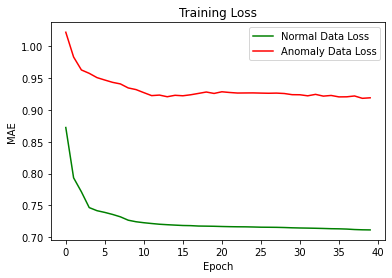

Train Loss 0.44310617
Test Loss 0.58323795


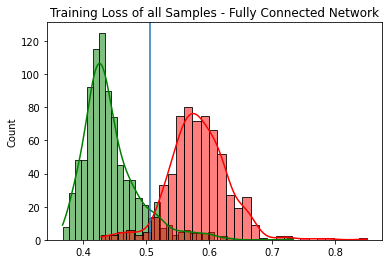

In [19]:
# Train with Normal Data, Evaluate with anomaly data
threshold = train(model_dense,
                  X_train=X_train_normal,
                  X_eval=X_train_anomaly,
                  epochs=40)

In [20]:
def plot_confusion_matrix(cm,
                          target_names,
                          title=' Confusion matrix',
                          cmap=None,
                          normalize=True,
                          dataset='_'):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / np.sum(cm).astype('float')
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(dataset + title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.savefig('Plots/cm' + dataset + '.png')
    plt.show()

In [21]:
def evaluation(X_test, y_test, threshold, dataset='Test'):
    test_pred = model_dense.predict(X_test)
    test_loss = tf.keras.losses.mae(test_pred, X_test).numpy()
    test_pred = (test_loss < threshold).astype(int)
    test_true = y_test.values.astype(int)

    acc = accuracy_score(test_true, test_pred)
    recall = recall_score(test_true, test_pred)
    precision = precision_score(test_true, test_pred)
    cm = confusion_matrix(test_true, test_pred, normalize=None)
    plot_confusion_matrix(cm, ['Anomaly', 'Normal'], normalize=False, dataset=dataset)


    print(dataset + ' Accuracy', acc)
    print(dataset + ' Recall', recall)
    print(dataset + ' Precision', precision)
    print('\nConfusion Matrix:\n',cm)
    

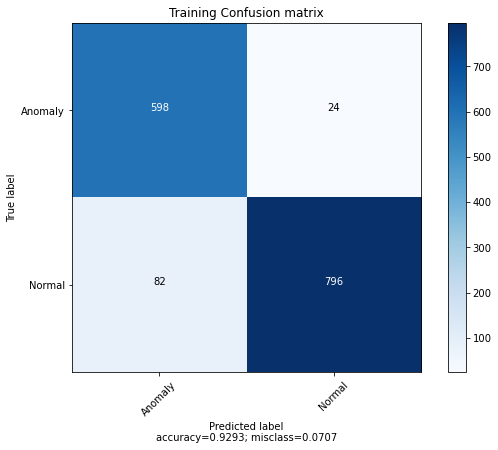

Training Accuracy 0.9293333333333333
Training Recall 0.9066059225512528
Training Precision 0.9707317073170731

Confusion Matrix:
 [[598  24]
 [ 82 796]]


In [22]:
evaluation(X_train, y_train, threshold, dataset='Training')

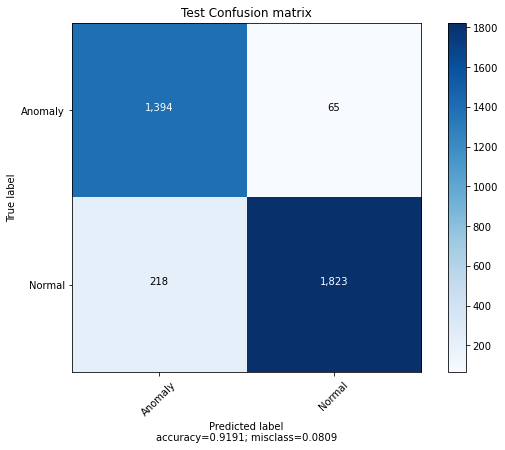

Test Accuracy 0.9191428571428572
Test Recall 0.8931896129348359
Test Precision 0.965572033898305

Confusion Matrix:
 [[1394   65]
 [ 218 1823]]


In [23]:
evaluation(X_test, y_test, threshold, dataset='Test')

In [24]:
def show_recon_series(model, batch=X_test.values, labels=y_test.values):
    pred = model.predict(batch)
    pred_losses = tf.keras.losses.mae(pred, batch).numpy()
    
    sns.histplot(pred_losses, color='black', kde=True)
    plt.show()
    
    for i in range(10):
        if labels[i] == 0:
            label = 'Anomaly'
        else:
            label = 'Normal'
        plt.plot(pred[i], label='Prediction')
        plt.plot(batch[i, :], label='True')
        plt.title(label + '  Loss:' + str(np.round(pred_losses[i],2)))
        plt.legend()
        plt.show()

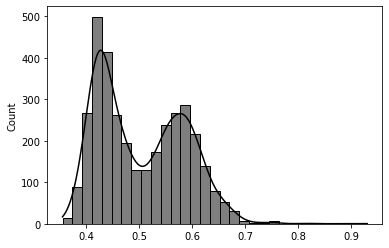

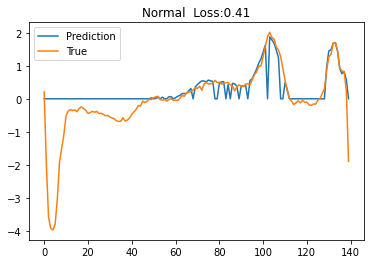

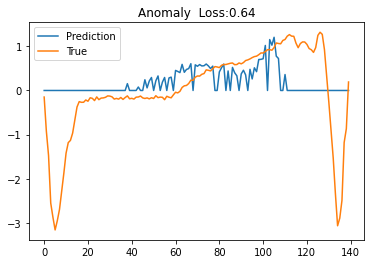

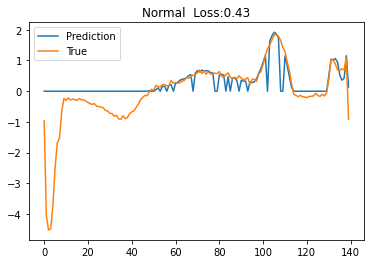

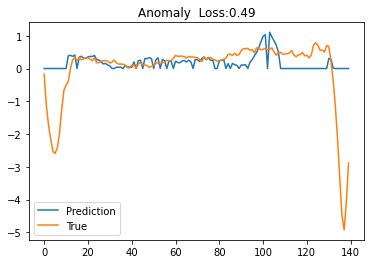

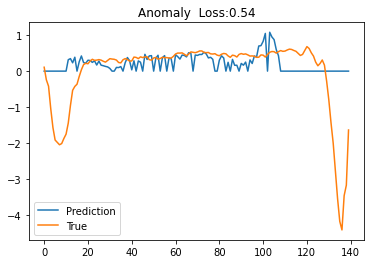

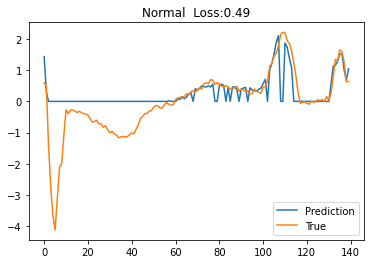

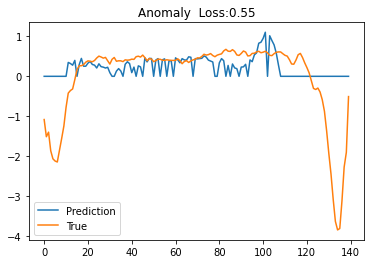

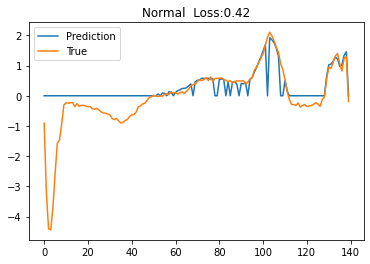

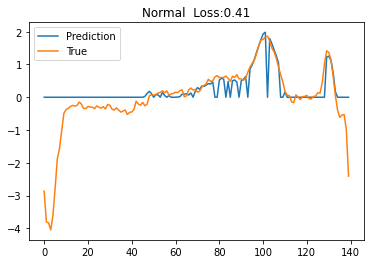

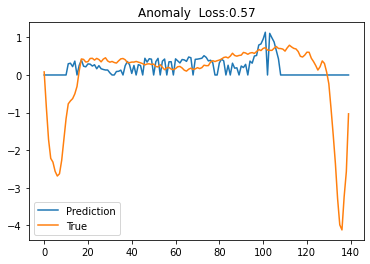

In [25]:
show_recon_series(model=model_dense)